# Descriptive plots

Now having the cleaned and proccessed data we can plot some descriptive plots on how is the state of global emissions up to 2021 globally and by regions.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v4_TOTALS.parquet')
data = data.query("Year > 1990")

In [47]:
total_col = 'Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt'

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

pop_col = 'Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No'

## CO2 emissions global tendency

#### "World" Region

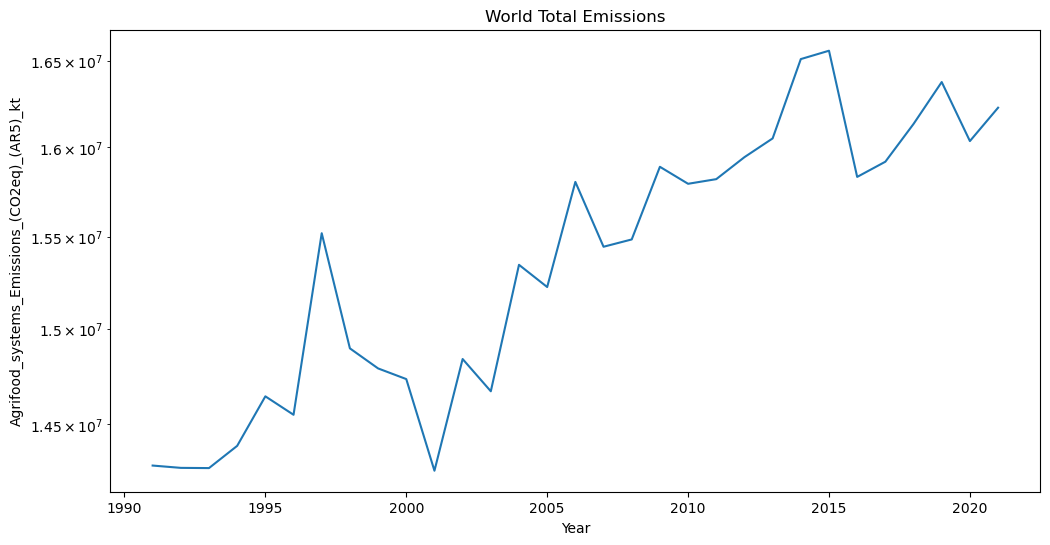

In [48]:
plot_data = data[data['Area'] == "World"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Year', y=total_col)
plt.title("World Total Emissions")
plt.yscale('log')

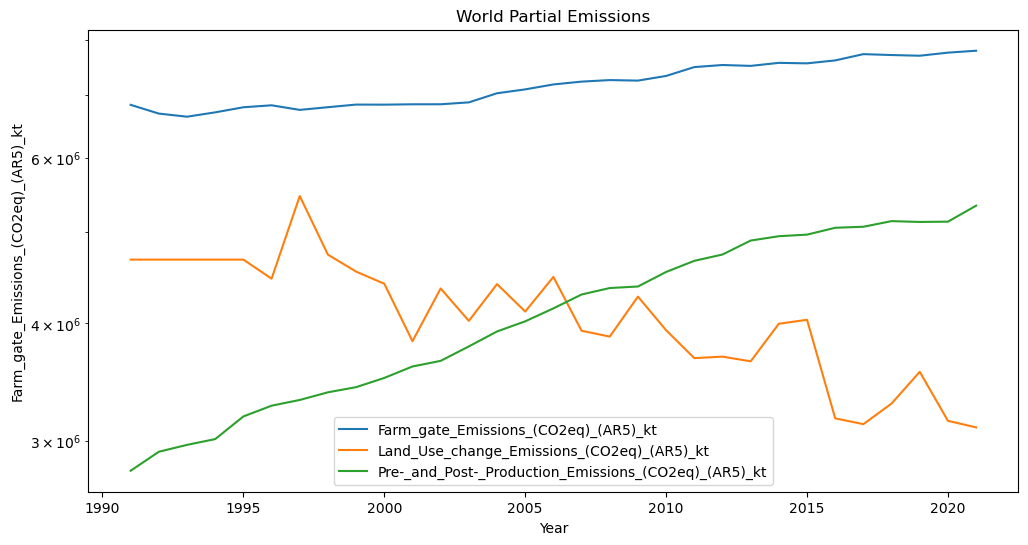

In [49]:
plot_data = data[data['Area'] == "World"]

plt.figure(figsize=(12, 6))
for col in columns_partials:
    sns.lineplot(data=plot_data, x='Year', y=col, label=col)
plt.title("World Partial Emissions")
plt.yscale('log')
# plt.ylim(0, 20)
plt.legend()
plt.show()


#### World but taking countries, not aggregated region

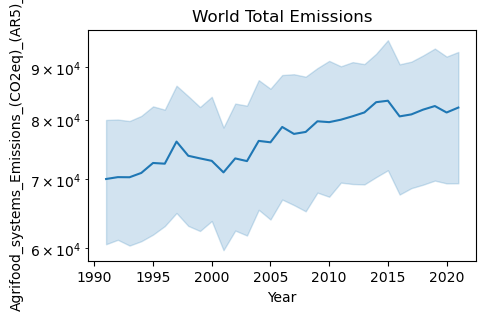

In [50]:
plot_data = data[data['Area Code'] < 1000]

plt.figure(figsize=(5, 3))
sns.lineplot(data=plot_data, x='Year', y=total_col, errorbar=('ci', 50))
plt.title("World Total Emissions")
plt.yscale('log')

Calculate the percentage change year to year of total emissions:

In [51]:
# Filter data between 2010 and 2021
data[data['Area'] == "World"][['Year']+[total_col]]

print(1.622754e+07/1.473578e+07)

1.1012338674980218


In [52]:
# Filter data between 2010 and 2021
plot_data = data[data['Area'] == "World"]
filtered_data = plot_data[(plot_data['Year'] >= 2016) & (plot_data['Year'] <= 2021)]

# Calculate year-over-year percentage change
filtered_data['pct_change'] = filtered_data[total_col].pct_change() * 100
filtered_data = filtered_data.dropna()

# Display the result
filtered_data[['Year', total_col, 'pct_change']]

/tmp/ipykernel_8063/1415569114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pct_change'] = filtered_data[total_col].pct_change() * 100


,Year,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,pct_change
7803,2017,1.591909e+07,0.541656
7804,2018,1.613419e+07,1.351254
7805,2019,1.637623e+07,1.500164
7806,2020,1.603626e+07,-2.075996
7807,2021,1.622754e+07,1.192798


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


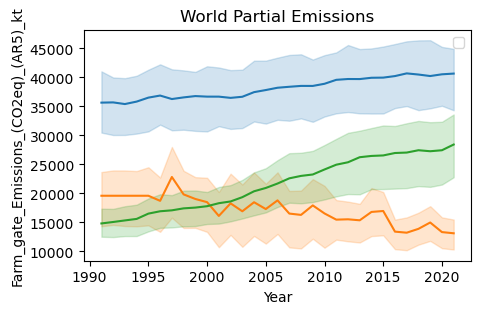

In [53]:
plot_data = data[data['Area Code'] < 1000]

plt.figure(figsize=(5, 3))
for col in columns_partials:
    sns.lineplot(data=plot_data, x='Year', y=col, errorbar=('ci', 50))
plt.title("World Partial Emissions")
# plt.yscale('log')
plt.legend()
plt.show()

#### Emissions by countries - Bubble Plot

In [54]:
continent_df = pd.read_csv("../data/FAOSTAT/clean_data/food_trading/country_to_continent.csv")

In [55]:
plot_data = data[data['Area Code'] < 1000]
plot_data = pd.merge(plot_data, continent_df, left_on='Area', right_on='Country', how='left')
plot_data = plot_data.dropna()

In [56]:
# Agrupar por 'Area', 'Year', y sumar 'total_col' y pop_col
grouped_data = plot_data.groupby(['Area', 'Year', 'Continent']).agg(
    {total_col: 'sum', pop_col: 'sum'}).reset_index()

# Filtrar los datos entre 1990 y 2021
filtered_data = grouped_data[(grouped_data['Year'] >= 1990) & (grouped_data['Year'] <= 2021)]
filtered_data

,Area,Year,Continent,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No
0,Afghanistan,1991,Asia,9942.2755,10745.167
1,Afghanistan,1992,Asia,10001.9592,12057.433
2,Afghanistan,1993,Asia,10087.9383,14003.760
3,Afghanistan,1994,Asia,10225.0284,15455.555
4,Afghanistan,1995,Asia,10727.9492,16418.912
...,...,...,...,...,...
5668,Zimbabwe,2017,Africa,24813.0988,14751.101
5669,Zimbabwe,2018,Africa,25181.4470,15052.184
5670,Zimbabwe,2019,Africa,24933.4963,15354.608
5671,Zimbabwe,2020,Africa,23834.1472,15669.666


In [57]:
plot_data[plot_data['Year'] == 1990]

,Area Code,Year,Area,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,...,Country_area_Area_1000_ha,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No,Gross_Domestic_Product_Annual_growth_US$_per_capita_%,Gross_Domestic_Product_Value_US$_million_USD,Gross_Domestic_Product_Value_US$_per_capita_USD,Continent,Country,Capital,Latitude,Longitude


In [58]:
# Filtrar datos para el año 1990
data_1990 = plot_data[plot_data['Year'] == 1991]

# Seleccionar los 100 países con el valor más alto en 'total_col'
top_100_countries = data_1990.nlargest(100, total_col)['Area']
top_100_countries

620                       Brazil
2759                   Indonesia
7502                       China
6572                        USSR
6665    United States of America
                  ...           
3627                      Malawi
5301       Serbia and Montenegro
1271                  Costa Rica
31                   Afghanistan
3007                     Jamaica
Name: Area, Length: 100, dtype: object

In [59]:
filtered_data.groupby('Area')[total_col].sum().sort_values()

Area
Tokelau       2.225640e+01
Niue          1.091883e+02
Monaco        1.844436e+02
San Marino    2.236133e+02
Tuvalu        2.678979e+02
                  ...     
India         3.317925e+07
Indonesia     3.390560e+07
USSR          3.410254e+07
Brazil        5.750342e+07
China         5.832010e+07
Name: Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt, Length: 183, dtype: float64

In [60]:
filtered_data

,Area,Year,Continent,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No
0,Afghanistan,1991,Asia,9942.2755,10745.167
1,Afghanistan,1992,Asia,10001.9592,12057.433
2,Afghanistan,1993,Asia,10087.9383,14003.760
3,Afghanistan,1994,Asia,10225.0284,15455.555
4,Afghanistan,1995,Asia,10727.9492,16418.912
...,...,...,...,...,...
5668,Zimbabwe,2017,Africa,24813.0988,14751.101
5669,Zimbabwe,2018,Africa,25181.4470,15052.184
5670,Zimbabwe,2019,Africa,24933.4963,15354.608
5671,Zimbabwe,2020,Africa,23834.1472,15669.666


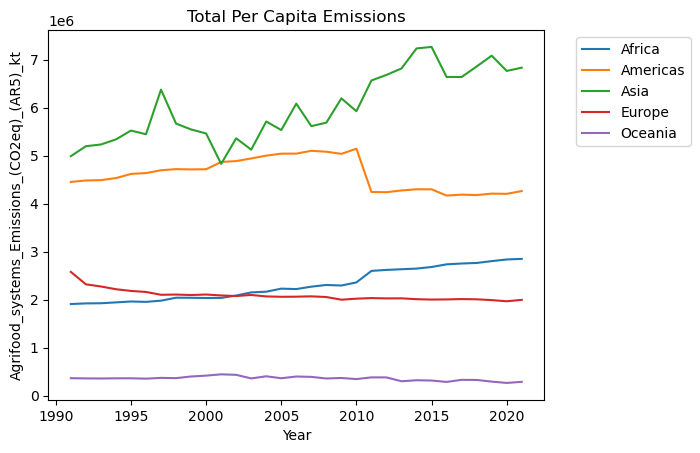

In [61]:
continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        # 'World'
]

regions = data[data['Area Code'] > 1000]
plot_data = regions[regions['Area'].isin(continents)]

sns.lineplot(data=plot_data, x='Year', y=total_col, hue='Area')
plt.title("Total Per Capita Emissions")
# plt.yscale('log')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [62]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# continents = [
#     'Africa',
#     'Americas',
#     'Asia',
#     'Europe',
#     'Oceania',
#     # 'World'
# ]

# continent_palette = {
#     'Africa': '#4E79A7',           # Blue
#     'Asia': '#EDC948',             # Yellow
#     'Europe': '#E15759',           # Red
#     'Oceania': '#B07AA1',          # Purple
#     'Americas': '#59A14F',    # Green
#     'Central America': '#F28E2B'   # Orange
# }

# regions = data[data['Area Code'] > 1000]
# plot_data = regions[regions['Area'].isin(continents)]

# # Create the line plot with the specified color palette
# sns.lineplot(data=plot_data, x='Year', y=total_col, hue='Area', palette=continent_palette)

# # Fill the area under each line with the same colors
# for area in plot_data['Area'].unique():
#     area_data = plot_data[plot_data['Area'] == area]
#     plt.fill_between(area_data['Year'], area_data[total_col], color=continent_palette[area], alpha=0.3)

# plt.title("Total Per Capita Emissions")
# # plt.yscale('log')

# # Move the legend outside the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


In [63]:
# Create stacked bar plot

continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        'World'
]

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

plot_data = data[data['Area'].isin(continents)]

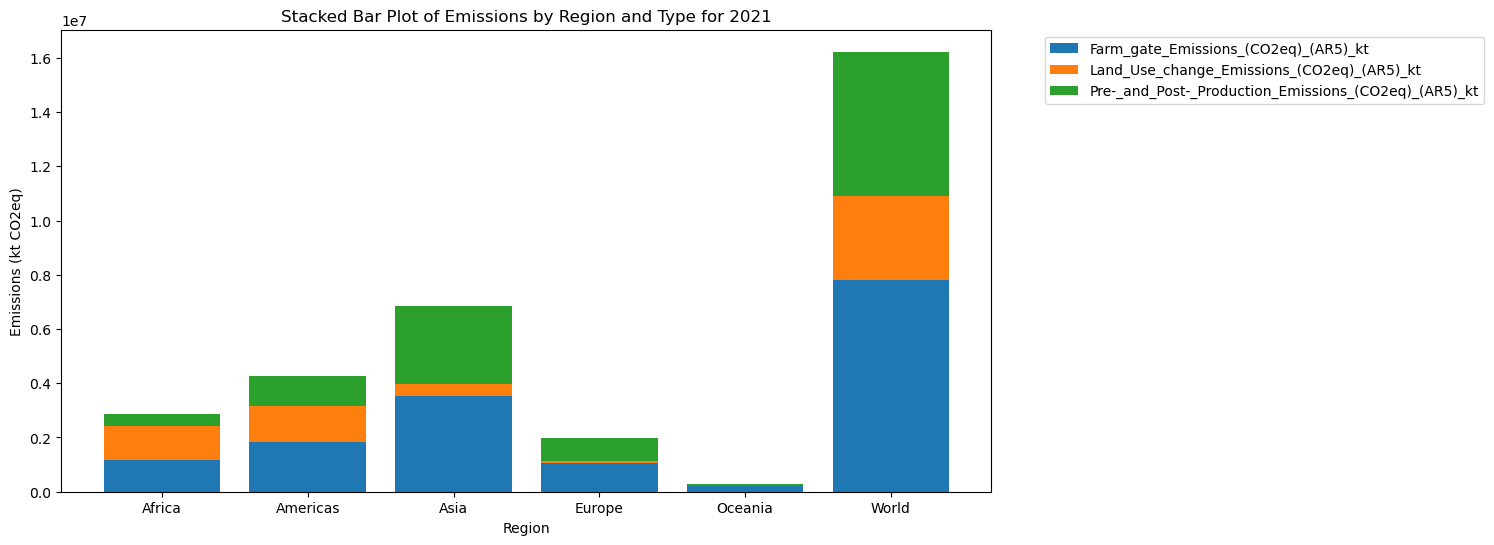

In [64]:
# Create stacked bar plot for the year 2021

continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        'World'
]

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

plot_data = data[(data['Area'].isin(continents)) & (data['Year'] == 2021)]

# Group by Area, then sum the emissions
grouped_data = plot_data.groupby('Area')[columns_partials].sum().reset_index()

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(grouped_data))
for col in columns_partials:
    plt.bar(grouped_data['Area'], grouped_data[col], bottom=bottom, label=col)
    bottom += grouped_data[col]

plt.title("Stacked Bar Plot of Emissions by Region and Type for 2021")
plt.xlabel("Region")
plt.ylabel("Emissions (kt CO2eq)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

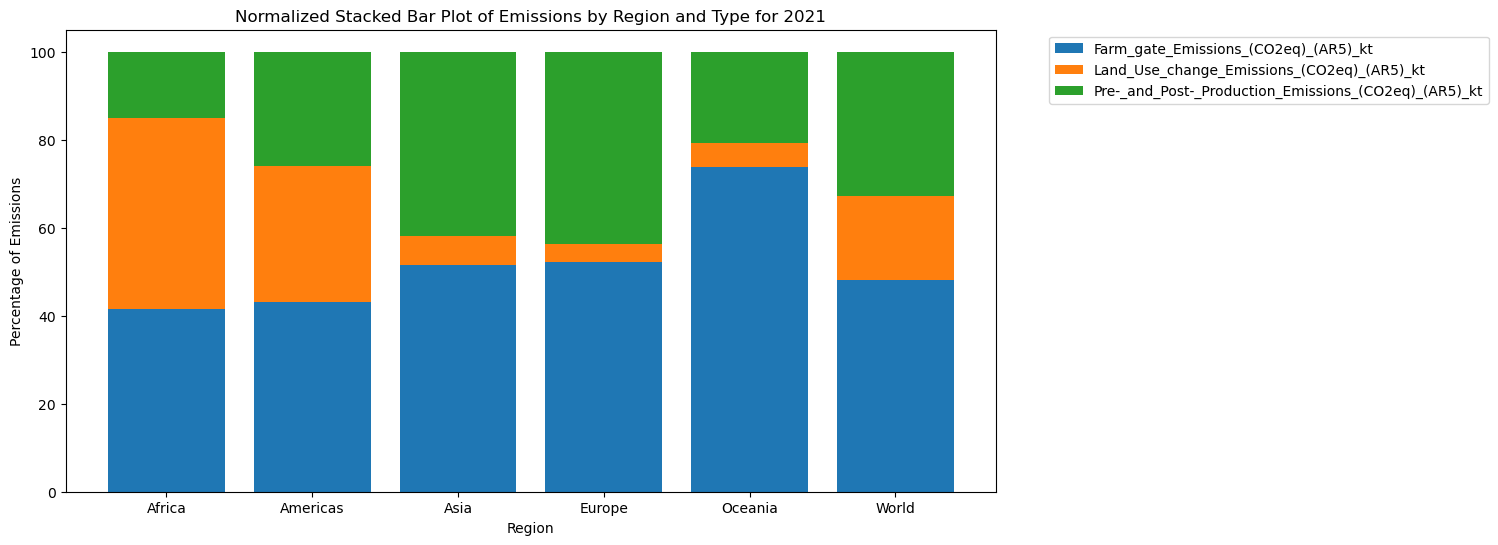

In [65]:
# Create normalized stacked bar plot for the year 2021

continents = [
        'Africa',
        'Americas',
        'Asia',
        'Europe',
        'Oceania',
        'World'
]

columns_partials = [
        'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
        'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
        'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt'
]

plot_data = data[(data['Area'].isin(continents)) & (data['Year'] == 2021)]

# Group by Area, then sum the emissions
grouped_data = plot_data.groupby('Area')[columns_partials].sum().reset_index()

# Normalize the columns to percentages
grouped_data[columns_partials] = grouped_data[columns_partials].div(grouped_data[columns_partials].sum(axis=1), axis=0) * 100

# Create the stacked bar plot
plt.figure(figsize=(12, 6))
bottom = np.zeros(len(grouped_data))
for col in columns_partials:
    plt.bar(grouped_data['Area'], grouped_data[col], bottom=bottom, label=col)
    bottom += grouped_data[col]

plt.title("Normalized Stacked Bar Plot of Emissions by Region and Type for 2021")
plt.xlabel("Region")
plt.ylabel("Percentage of Emissions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()